<a href="https://colab.research.google.com/github/kouchan0708/q-macro/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-13f62c238409>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt['rgdpe_pc'] = pwt['rgdpe'] / pwt['pop']  # 一人当たり実質GDP
<ipython-input-2-13f62c238409>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt['rgdpe_growth'] = pwt.groupby('country')['rgdpe_pc'].pct_change() * 100  # GDP成長率
<ipython-input-2-13f62c238409>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

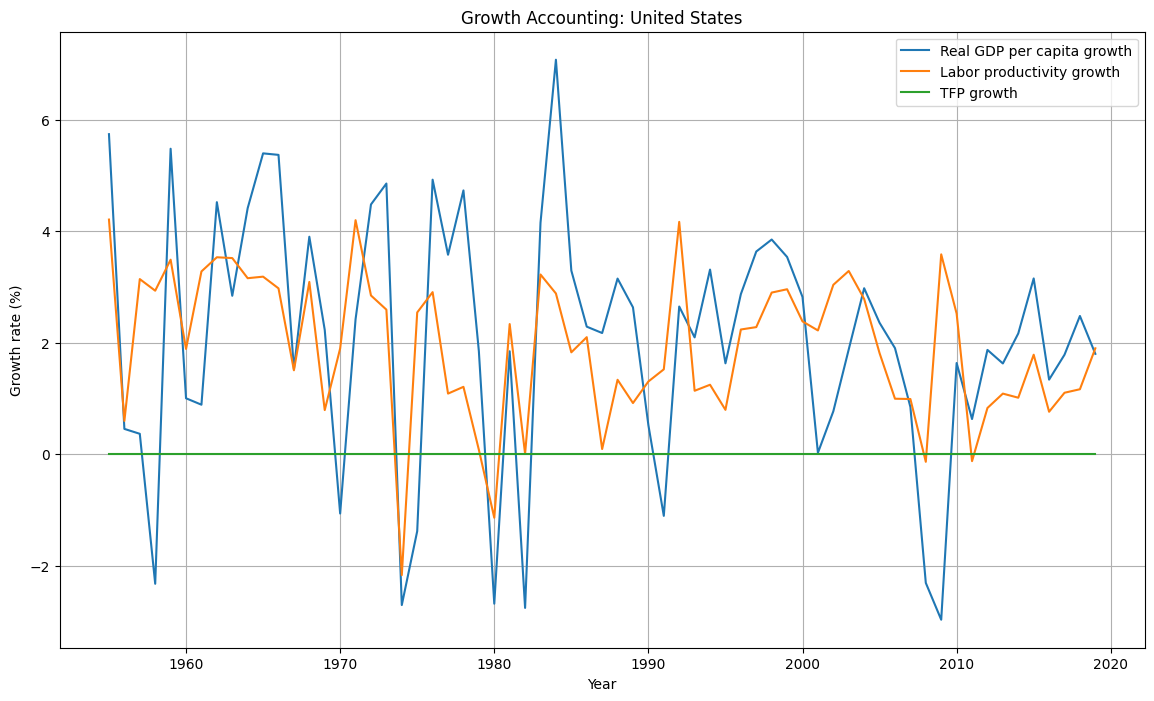

 Year  Real GDP per capita growth (%)  Labor productivity growth (%)  TFP growth (%)
 1955                        5.739267                       4.207231             0.0
 1956                        0.451849                       0.594700             0.0
 1957                        0.363686                       3.139314             0.0
 1958                       -2.327046                       2.931012             0.0
 1959                        5.478076                       3.487472             0.0
 1960                        1.001022                       1.886008             0.0
 1961                        0.885853                       3.276692             0.0
 1962                        4.519369                       3.531041             0.0
 1963                        2.840300                       3.516332             0.0
 1964                        4.412301                       3.155303             0.0
 1965                        5.394944                       3.183

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 最新のPenn World Tableデータをダウンロードする
pwt_url = 'https://www.rug.nl/ggdc/docs/pwt100.xlsx'
pwt_data = pd.read_excel(pwt_url, sheet_name='Data')

# 必要な列のみを抽出する
columns_needed = ['country', 'year', 'rgdpe', 'pop', 'emp', 'avh', 'hc', 'ccon', 'ctfp']
pwt = pwt_data[columns_needed]

# データの前処理
pwt['rgdpe_pc'] = pwt['rgdpe'] / pwt['pop']  # 一人当たり実質GDP
pwt['rgdpe_growth'] = pwt.groupby('country')['rgdpe_pc'].pct_change() * 100  # GDP成長率

# 労働生産性
pwt['labor_productivity'] = pwt['rgdpe'] / (pwt['emp'] * pwt['avh'])
pwt['lp_growth'] = pwt.groupby('country')['labor_productivity'].pct_change() * 100  # 労働生産性成長率

# TFP成長率
pwt['tfp_growth'] = pwt.groupby('country')['ctfp'].pct_change() * 100

# 必要なデータを抽出
growth_data = pwt[['country', 'year', 'rgdpe_growth', 'lp_growth', 'tfp_growth', 'hc']].dropna()

# 特定の国のデータを抽出する（例：アメリカ）
country_data = growth_data[growth_data['country'] == 'United States']

# グラフの作成
plt.figure(figsize=(14, 8))  # グラフの縦横を調整
plt.plot(country_data['year'], country_data['rgdpe_growth'], label='Real GDP per capita growth')
plt.plot(country_data['year'], country_data['lp_growth'], label='Labor productivity growth')
plt.plot(country_data['year'], country_data['tfp_growth'], label='TFP growth')
plt.xlabel('Year')
plt.ylabel('Growth rate (%)')
plt.title('Growth Accounting: United States')
plt.legend()
plt.grid(True)
plt.show()

# 表の作成
table_data = country_data[['year', 'rgdpe_growth', 'lp_growth', 'tfp_growth']].copy()
table_data.columns = ['Year', 'Real GDP per capita growth (%)', 'Labor productivity growth (%)', 'TFP growth (%)']
print(table_data.to_string(index=False))


<ipython-input-3-8b49d702ba2b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt['rgdpe_pc'] = pwt['rgdpe'] / pwt['pop']  # 一人当たり実質GDP
<ipython-input-3-8b49d702ba2b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt['growth_rate'] = pwt.groupby('country')['rgdpe_pc'].pct_change() * 100  # GDP成長率
<ipython-input-3-8b49d702ba2b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

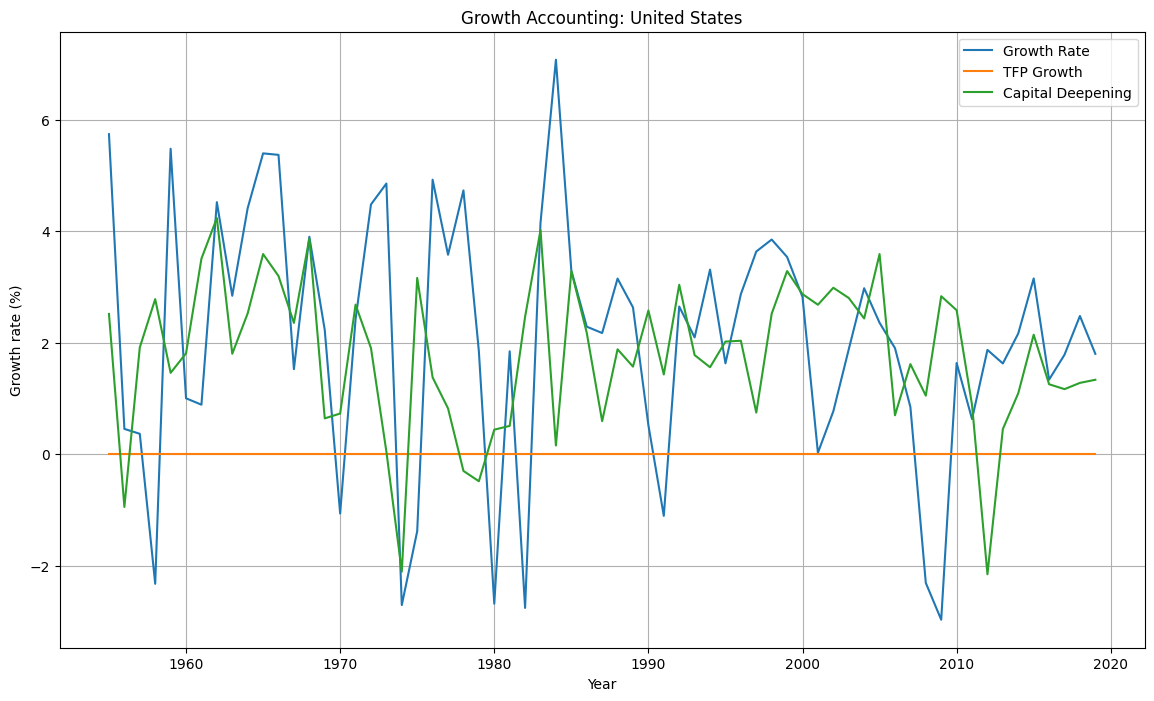

 Year  Growth Rate (%)  TFP Growth (%)  Capital Deepening (%)    TFP Share  Capital Share
 1955         5.739267             0.0               2.514329 4.212940e-07            1.0
 1956         0.451849             0.0              -0.949074 4.152851e-07            1.0
 1957         0.363686             0.0               1.914288 4.054972e-07            1.0
 1958        -2.327046             0.0               2.779817 4.017658e-07            1.0
 1959         5.478076             0.0               1.457389 3.871090e-07            1.0
 1960         1.001022             0.0               1.806930 3.739487e-07            1.0
 1961         0.885853             0.0               3.506476 3.610273e-07            1.0
 1962         4.519369             0.0               4.234419 3.412829e-07            1.0
 1963         2.840300             0.0               1.799686 3.306111e-07            1.0
 1964         4.412301             0.0               2.524030 3.152864e-07            1.0
 1965     

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 最新のPenn World Tableデータをダウンロードする
pwt_url = 'https://www.rug.nl/ggdc/docs/pwt100.xlsx'
pwt_data = pd.read_excel(pwt_url, sheet_name='Data')

# 必要な列のみを抽出する
columns_needed = ['country', 'year', 'rgdpe', 'pop', 'emp', 'avh', 'hc', 'ccon', 'ctfp']
pwt = pwt_data[columns_needed]

# データの前処理
pwt['rgdpe_pc'] = pwt['rgdpe'] / pwt['pop']  # 一人当たり実質GDP
pwt['growth_rate'] = pwt.groupby('country')['rgdpe_pc'].pct_change() * 100  # GDP成長率

# 労働生産性
pwt['labor_productivity'] = pwt['rgdpe'] / (pwt['emp'] * pwt['avh'])
pwt['tfp_growth'] = pwt.groupby('country')['ctfp'].pct_change() * 100

# 資本深化 (Capital Deepening)
pwt['capital_deepening'] = (pwt['ccon'] / pwt['emp']).pct_change() * 100

# 資本シェアとTFPシェア
pwt['capital_share'] = pwt['ccon'] / (pwt['ccon'] + pwt['ctfp'])
pwt['tfp_share'] = pwt['ctfp'] / (pwt['ccon'] + pwt['ctfp'])

# 必要なデータを抽出
growth_data = pwt[['country', 'year', 'growth_rate', 'tfp_growth', 'capital_deepening', 'tfp_share', 'capital_share']].dropna()

# 特定の国のデータを抽出する（例：アメリカ）
country_data = growth_data[growth_data['country'] == 'United States']

# グラフの作成
plt.figure(figsize=(14, 8))  # グラフの縦横を調整
plt.plot(country_data['year'], country_data['growth_rate'], label='Growth Rate')
plt.plot(country_data['year'], country_data['tfp_growth'], label='TFP Growth')
plt.plot(country_data['year'], country_data['capital_deepening'], label='Capital Deepening')
plt.xlabel('Year')
plt.ylabel('Growth rate (%)')
plt.title('Growth Accounting: United States')
plt.legend()
plt.grid(True)
plt.show()

# 表の作成
table_data = country_data[['year', 'growth_rate', 'tfp_growth', 'capital_deepening', 'tfp_share', 'capital_share']].copy()
table_data.columns = ['Year', 'Growth Rate (%)', 'TFP Growth (%)', 'Capital Deepening (%)', 'TFP Share', 'Capital Share']
print(table_data.to_string(index=False))


<ipython-input-5-0443e416f293>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt_oecd['rgdpe_pc'] = pwt_oecd['rgdpe'] / pwt_oecd['pop']  # 一人当たり実質GDP
<ipython-input-5-0443e416f293>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pwt_oecd['growth_rate'] = pwt_oecd.groupby('country')['rgdpe_pc'].pct_change() * 100  # GDP成長率
<ipython-input-5-0443e416f293>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

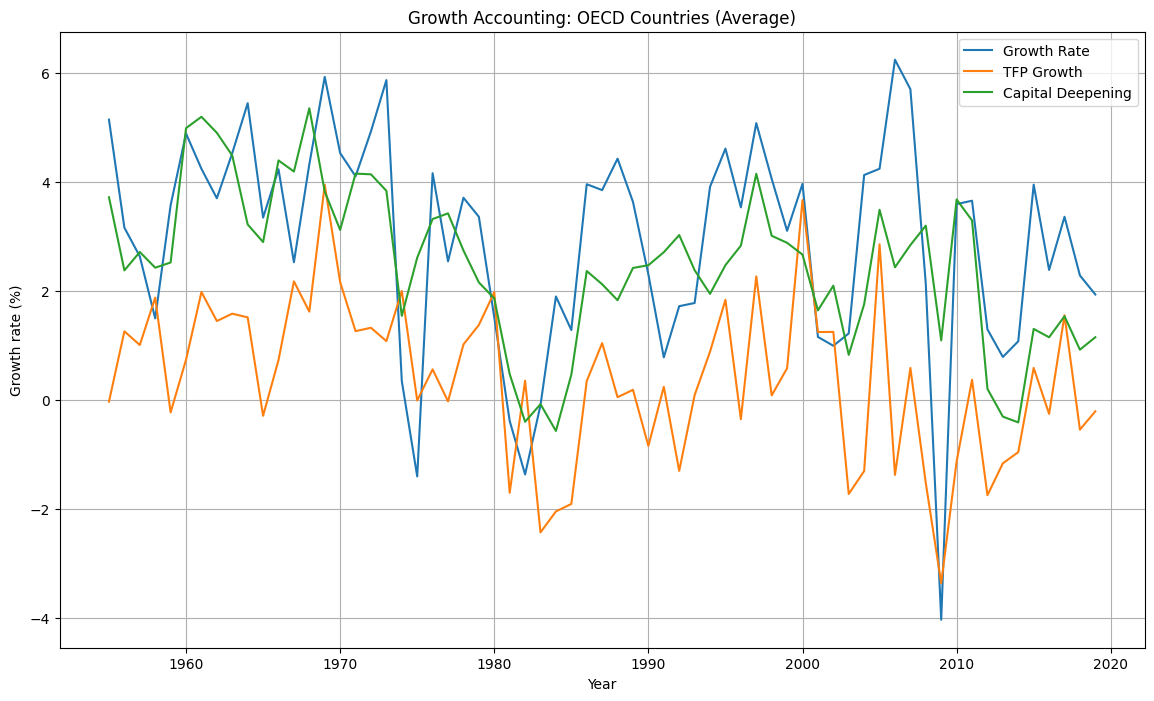

       Country  Growth Rate (%)  TFP Growth (%)  Capital Deepening (%)    TFP Share  Capital Share
     Australia         1.992780        0.170212               1.684081 3.055334e-06       0.999997
       Austria         3.258231        0.341611               2.544632 6.880008e-06       0.999993
       Belgium         2.622270        0.303624               2.341651 5.736560e-06       0.999994
        Canada         2.091928       -0.007160               1.667953 2.057099e-06       0.999998
         Chile         2.514065        0.060077               1.553440 9.548573e-06       0.999990
      Colombia         1.995997        0.181650               1.452502 4.465628e-06       0.999996
Czech Republic         2.730269       -0.408043               2.045609 2.700548e-06       0.999997
       Denmark         2.532261        0.309642               1.988506 9.764164e-06       0.999990
       Estonia         5.832616        1.690472               4.282832 2.694350e-05       0.999973
       Fin

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 最新のPenn World Tableデータをダウンロードする
pwt_url = 'https://www.rug.nl/ggdc/docs/pwt100.xlsx'
pwt_data = pd.read_excel(pwt_url, sheet_name='Data')

# 必要な列のみを抽出する
columns_needed = ['country', 'year', 'rgdpe', 'pop', 'emp', 'avh', 'hc', 'ccon', 'ctfp']
pwt = pwt_data[columns_needed]

# OECD加盟国リスト
oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Republic of', 'Latvia', 'Lithuania',
    'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
    'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
    'United States'
]

# OECD加盟国のデータをフィルタリング
pwt_oecd = pwt[pwt['country'].isin(oecd_countries)]

# データの前処理
pwt_oecd['rgdpe_pc'] = pwt_oecd['rgdpe'] / pwt_oecd['pop']  # 一人当たり実質GDP
pwt_oecd['growth_rate'] = pwt_oecd.groupby('country')['rgdpe_pc'].pct_change() * 100  # GDP成長率

# 労働生産性
pwt_oecd['labor_productivity'] = pwt_oecd['rgdpe'] / (pwt_oecd['emp'] * pwt_oecd['avh'])
pwt_oecd['tfp_growth'] = pwt_oecd.groupby('country')['ctfp'].pct_change() * 100

# 資本深化 (Capital Deepening)
pwt_oecd['capital_deepening'] = (pwt_oecd['ccon'] / pwt_oecd['emp']).pct_change() * 100

# 資本シェアとTFPシェア
pwt_oecd['capital_share'] = pwt_oecd['ccon'] / (pwt_oecd['ccon'] + pwt_oecd['ctfp'])
pwt_oecd['tfp_share'] = pwt_oecd['ctfp'] / (pwt_oecd['ccon'] + pwt_oecd['ctfp'])

# 必要なデータを抽出
growth_data_oecd = pwt_oecd[['country', 'year', 'growth_rate', 'tfp_growth', 'capital_deepening', 'tfp_share', 'capital_share']].dropna()

# 数値列のみを選択して平均を計算
numeric_columns = ['growth_rate', 'tfp_growth', 'capital_deepening', 'tfp_share', 'capital_share']
oecd_avg = growth_data_oecd.groupby('year')[numeric_columns].mean().reset_index()

# グラフの作成
plt.figure(figsize=(14, 8))  # グラフの縦横を調整
plt.plot(oecd_avg['year'], oecd_avg['growth_rate'], label='Growth Rate')
plt.plot(oecd_avg['year'], oecd_avg['tfp_growth'], label='TFP Growth')
plt.plot(oecd_avg['year'], oecd_avg['capital_deepening'], label='Capital Deepening')
plt.xlabel('Year')
plt.ylabel('Growth rate (%)')
plt.title('Growth Accounting: OECD Countries (Average)')
plt.legend()
plt.grid(True)
plt.show()

# 表の作成
table_data_oecd = growth_data_oecd.groupby('country')[numeric_columns].mean().reset_index()
table_data_oecd.columns = ['Country', 'Growth Rate (%)', 'TFP Growth (%)', 'Capital Deepening (%)', 'TFP Share', 'Capital Share']
print(table_data_oecd.to_string(index=False))
